<br><br><br><br><br><br>
# Regression Logistic Data Social Network Ads
***


### Import Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

### Load Data

In [20]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Informations of Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


###### Merubah variabel gender menjadi variabel dummy

In [5]:
data.drop(["User ID"],axis=1,inplace=True)
data.Gender=[1 if each== "Female" else 0 for each in data.Gender]
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


### Buat Model Logistic Regression

In [6]:
model = LogisticRegression(max_iter=10000)

In [7]:
x = data.iloc[:,0:3]

In [8]:
y = data.iloc[:,-1]

In [9]:
# Normalization
x=(x-np.min(x))/(np.max(x)-np.min(x)).values

C:\ProgramData\Anaconda3\envs\belajar_ai\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\envs\belajar_ai\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
#Train Model
model.fit(x,y)

LogisticRegression(max_iter=10000)

### Predictions

In [13]:
y_pred_class = model.predict(x)

In [15]:
df_hasil = pd.DataFrame({'y_actual':data['Purchased'],
                        'y_pred':y_pred_class})
df_hasil.head (n=20)

,y_actual,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


### Evaluasi

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
cm = confusion_matrix(data['Purchased'],y_pred_class) #y_actual, y_prediksi
cm

array([[241,  16],
       [ 54,  89]], dtype=int64)

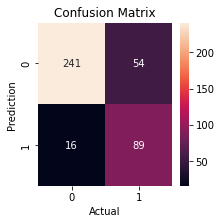

In [18]:
plt.figure(figsize=(3,3))
sns.heatmap(cm.T, annot=True, fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction');

In [19]:
print(classification_report(data['Purchased'], y_pred_class)) #y_actual, y_predict

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       257
           1       0.85      0.62      0.72       143

    accuracy                           0.82       400
   macro avg       0.83      0.78      0.80       400
weighted avg       0.83      0.82      0.82       400



Dari evaluasi tersebut dapat digunakan teknik precision yaitu orang yang diprerdiksi benar membeli dan ternyata membeli, yaitu sebesar 0.85.